In [1]:
from urllib import request
import re
from bs4 import BeautifulSoup
import json
import pandas as pd

In [2]:
resp=request.urlopen("https://www.immobiliare.it/vendita-case/roma/")

In [3]:
soup = BeautifulSoup(resp, "html.parser")

# **Retrieve data through json**

In [4]:
lista_case_1 = soup.find_all("script", attrs={"id":"__NEXT_DATA__"})


In [5]:
case_j=json.loads(lista_case_1[0].text)


In [6]:
#old
#case_j["props"]['pageProps']["dehydratedState"]["queries"][0]["state"]["data"]["pages"][0]["results"][0]

KeyError: 'pages'

In [28]:
case_j["props"]['pageProps']["dehydratedState"]["queries"][0]["state"]["data"]["results"][0]

AttributeError: 'list' object has no attribute 'keys'

In [31]:
case_i_j["props"]['pageProps']["dehydratedState"]["queries"][0]["state"]["data"]["seoData"]["nextPage"]

'https://www.immobiliare.it/vendita-case/roma/?pag=2'

In [12]:
features_l = ["bathrooms", "rooms", "surface", "floor", "price", "latitude",
              "longitude", "id", "caption", "description", "contract", "condition",
              "ascensore", "garage"]
#method_l = [None, None, None, "value", "latitude", "longitude"]
#old
#len(case_j["props"]['pageProps']["dehydratedState"]["queries"][0]["state"]["data"]["pages"][0]["results"])
len(case_j["props"]['pageProps']["dehydratedState"]["queries"][0]["state"]["data"]["results"])

25

In [14]:
case_j["props"]['pageProps']["dehydratedState"]["queries"][0]["state"]["data"]["results"][0]["realEstate"]["properties"][0].keys()
#case_j["props"]['pageProps']["dehydratedState"]["queries"][0]["state"]["data"]["pages"][0]["results"][0]["realEstate"]["properties"][0].keys()
#case_j["props"]['pageProps']["dehydratedState"]["queries"][0]["state"]["data"]["pages"][0]["results"][0]["realEstate"]["properties"][0]["location"]


dict_keys(['income', 'multimedia', 'bathrooms', 'ga4Bathrooms', 'bedRoomsNumber', 'floor', 'floors', 'ga4Condition', 'condition', 'price', 'rooms', 'hasElevators', 'surface', 'surfaceValue', 'typology', 'typologyV2', 'typologyGA4Translation', 'ga4features', 'caption', 'category', 'description', 'energy', 'features', 'photo', 'location'])

In [15]:
def find_integers_in_string(s):
    pattern = r'\b\d+\b'  # matches any sequence of digits that forms a whole word
    numbers = [int(num) for num in re.findall(pattern, s)]
    return numbers


In [32]:
feature_m = []
case_i_j = case_j
ii=0
while True:
  ii+=1
  print("Page #"+str(ii))
# for casa in case_i_j["props"]['pageProps']["dehydratedState"]["queries"][0]["state"]["data"]["pages"][0]["results"]:
  for casa in case_j["props"]['pageProps']["dehydratedState"]["queries"][0]["state"]["data"]["results"]:
    casa_db = casa["realEstate"]["properties"][0]
    if not("surface" in casa_db.keys()) or not("value" in casa_db["price"].keys()):
      continue
    if "bathrooms" in casa_db.keys():
      nbagni = casa_db["bathrooms"]
    elif "ga4Bathrooms" in casa_db.keys():
      nbagni = casa_db["ga4Bathrooms"]
    else:
      nbagni = pd.NA
    if 'condition' in casa_db.keys():
      condition = casa_db['condition']
    else:
      condition = pd.NA
    ascensore = casa_db["hasElevators"]
    if "ga4Garage" in casa_db.keys():
      garage = casa_db["ga4Garage"]
    else:
      garage = pd.NA
    if "rooms" in casa_db.keys():
      nstanze = casa_db["rooms"]
    else:
      nstanze = pd.NA
    superficie = casa_db["surface"]
    if "floor" in casa_db.keys():
      piano = casa_db["floor"]["value"] if casa_db["floor"] != None else None
    elif "floors" in casa_db.keys():
      piano = find_integers_in_string(casa_db["floors"])[0] if casa_db["floors"] != None else None
    else:
      piano = pd.NA
    prezzo = casa_db["price"]["value"]
    latitudine = casa_db["location"]["latitude"]
    longitudine = casa_db["location"]["longitude"]
    id_ = casa["realEstate"]['id']
    contract = casa["realEstate"]['contract']
    if 'caption' in casa_db.keys():
      caption = casa_db['caption']
    else:
      caption = pd.NA
    if "description" in casa_db.keys():
      description = casa_db['description']
    else:
      description = pd.NA
    feature_m.append((nbagni, nstanze, superficie, piano, prezzo, latitudine,
                      longitudine, id_, caption, description, contract, condition,
                      ascensore, garage))
  next_page = case_i_j["props"]['pageProps']["dehydratedState"]["queries"][0]["state"]["data"]["seoData"]["nextPage"]
  if next_page == None:
    print("Completed")
    break
  resp=request.urlopen(next_page)
  soup = BeautifulSoup(resp, "html.parser")
  lista_case_i = soup.find_all("script", attrs={"id":"__NEXT_DATA__"})
  case_i_j=json.loads(lista_case_i[0].text)



Page #1
Page #2
Page #3
Page #4
Page #5
Page #6
Page #7
Page #8
Page #9
Page #10
Page #11
Page #12
Page #13
Page #14
Page #15
Page #16
Page #17
Page #18
Page #19
Page #20
Page #21
Page #22
Page #23
Page #24
Page #25
Page #26
Page #27
Page #28
Page #29
Page #30
Page #31
Page #32
Page #33
Page #34
Page #35
Page #36
Page #37
Page #38
Page #39
Page #40
Page #41
Page #42
Page #43
Page #44
Page #45
Page #46
Page #47
Page #48
Page #49
Page #50
Page #51
Page #52
Page #53
Page #54
Page #55
Page #56
Page #57
Page #58
Page #59
Page #60
Page #61
Page #62
Page #63
Page #64
Page #65
Page #66
Page #67
Page #68
Page #69
Page #70
Page #71
Page #72
Page #73
Page #74
Page #75
Page #76
Page #77
Page #78
Page #79
Page #80
Completed


In [33]:
f_save = feature_m

In [34]:
#chatGPT optimised version according to my requests:
feature_m = []

variable_list = [
    ("nbagni", ["bathrooms", "ga4Bathrooms"], True),
    ("condition", ["condition"], True),
    ("ascensore", ["hasElevators"], False),
    ("garage", ["ga4Garage"], True),
    ("nstanze", ["rooms"], True),
    ("superficie", ["surface"], False),
    ("piano", ["floor", "floors"], False),
    ("prezzo", ["price"], False),
    ("latitudine", ["location", "latitude"], False),
    ("longitudine", ["location", "longitude"], False),
    ("id_", ["realEstate", "id"], False),
    ("contract", ["realEstate", "contract"], False),
    ("caption", ["caption"], True),
    ("description", ["description"], True)
]

def get_value(obj, keys):
    for key in keys:
        if key in obj:
            return obj[key]
    return None

while True:
    ii += 1
    print("Page #" + str(ii))
    for casa in case_i_j["props"]["pageProps"]["dehydratedState"]["queries"][0]["state"]["data"]["pages"][0]["results"]:
        casa_db = casa["realEstate"]["properties"][0]

        if not all(get_value(casa_db, keys) for _, keys, optional in variable_list if not optional):
            continue

        feature = []
        for var, keys, _ in variable_list:
            value = get_value(casa_db, keys)
            feature.append(value if value is not None else pd.NA)
        feature_m.append(tuple(feature))

    next_page = case_i_j["props"]["pageProps"]["dehydratedState"]["queries"][0]["state"]["data"]["pages"][0]["seoData"]["nextPage"]

    if next_page is None:
        print("Completed")
        break

    resp = request.urlopen(next_page)
    soup = BeautifulSoup(resp, "html.parser")
    lista_case_i = soup.find_all("script", attrs={"id": "__NEXT_DATA__"})
    case_i_j = json.loads(lista_case_i[0].text)

Page #81


KeyError: 'pages'

In [ ]:
feature_m

[]

In [35]:
import pickle as pkl
with open("out.pkl", "wb") as out:
  pkl.dump(feature_m, out)


In [36]:
import os
os.getcwd()

'/content'

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
casa_db

{'income': False,
 'multimedia': {'photos': [{'id': 1465181679,
    'caption': '1',
    'urls': {'small': 'https://pwm.im-cdn.it/image/1465181679/xxs-c.jpg'}},
   {'id': 1465181891,
    'caption': '2',
    'urls': {'small': 'https://pwm.im-cdn.it/image/1465181891/xxs-c.jpg'}},
   {'id': 1465181929,
    'caption': '3',
    'urls': {'small': 'https://pwm.im-cdn.it/image/1465181929/xxs-c.jpg'}},
   {'id': 1465181837,
    'caption': '4',
    'urls': {'small': 'https://pwm.im-cdn.it/image/1465181837/xxs-c.jpg'}},
   {'id': 1465181989,
    'caption': '5',
    'urls': {'small': 'https://pwm.im-cdn.it/image/1465181989/xxs-c.jpg'}},
   {'id': 1465182009,
    'caption': '6',
    'urls': {'small': 'https://pwm.im-cdn.it/image/1465182009/xxs-c.jpg'}},
   {'id': 1465181861,
    'caption': '7',
    'urls': {'small': 'https://pwm.im-cdn.it/image/1465181861/xxs-c.jpg'}},
   {'id': 1465181961,
    'caption': '8',
    'urls': {'small': 'https://pwm.im-cdn.it/image/1465181961/xxs-c.jpg'}},
   {'id': 1465

In [39]:
casa_df = pd.DataFrame(data=feature_m, columns=features_l)
print(casa_df.shape)

(0, 14)


In [40]:
casa_df.to_csv("out.csv")


**Data elaboration**

Features:'bathrooms', 'rooms', 'surface', 'floor', 'price', 'latitude', 'longitude', 'id', 'caption', 'description', 'contract'

In [41]:
casa_df.drop(casa_df[casa_df.contract=="auction"].index, inplace=True)
print(casa_df.shape)

(0, 14)


In [42]:
casa_df.drop(casa_df[casa_df.surface.str.endswith(" m²")!=True].index, inplace=True) #remove None
casa_df.loc[:, 'surface'] = casa_df.loc[:, "surface"].map(lambda s: float(s.replace(' m²', "")))

In [43]:
casa_df['price'] = casa_df.price.astype(float)

In [44]:
def ret_piano(x):
  score = {"terra":0, "rialzato":.5, "ammezzato":.5, "su più livelli":1, "attico":2}
  if ((type(x)!=str) and (type(x)!=int)) and ((type(x) == pd._libs.missing.NAType) or (x == None)):
    return pd.NA
  elif type(x) == int:
    return x
  elif x.isdigit():
    return int(x)
  x=x.lower()
  ltgf = re.findall(r"interrato", x)
  if len(ltgf) == 1:
    return -1
  elif len(ltgf)>1:
    print("matched interrato multiple times")
    return -1
  gf = re.findall(r"terra|rialzato|ammezzato|su più livelli|attico", x)
  if len(gf) == 1:
    return score[gf[0]]
  elif len(gf)>1:
    return  max(map(lambda x: score[x], gf))


  intermediate_f = re.findall(r"\d{1,2}(?=\°)", x)
  if len(intermediate_f) == 1:
    return int(intermediate_f[0])
  elif len(intermediate_f) > 1:
      return min(list(map(int, intermediate_f)))

  return pd.NA
#    else:
#      n_floor = int(re.findall(r"\d(?= piani)", x)[0])


In [45]:
casa_df["piano"] = casa_df.floor.map(ret_piano)

In [46]:
casa_df['price_per_square_m'] = casa_df.price / casa_df.surface

In [47]:
casa_df.set_index('id', inplace=True)

In [48]:
casa_df.loc[casa_df["garage"].notna(), "garage"] = True

In [49]:
casa_df.drop(columns=['description', 'contract', "floor", "caption"], inplace=True)

In [50]:
casa_df.loc[casa_df.rooms == "5+", "rooms"] = "6"

In [51]:
casa_df.loc[casa_df.bathrooms == "3+", "bathrooms"] = "4"

In [52]:
casa_df.loc[casa_df.rooms.notna()& casa_df.rooms.str.isdigit(), "rooms"]=casa_df.rooms[casa_df.rooms.notna() & casa_df.rooms.str.isdigit()].astype("int")

In [53]:
casa_df.loc[casa_df.bathrooms.notna(), "bathrooms"]=casa_df.bathrooms[casa_df.bathrooms.notna()].astype("int")

In [54]:
casa_df.dtypes

bathrooms              object
rooms                  object
surface                object
price                 float64
latitude               object
longitude              object
condition              object
ascensore              object
garage                 object
piano                  object
price_per_square_m     object
dtype: object

In [55]:
cond_d = {"Ottimo / Ristrutturato":4, 'Buono / Abitabile':3, 'Nuovo / In costruzione':2, 'Da ristrutturare':1}
casa_df.loc[casa_df["condition"].notna(), "condition"] = casa_df.loc[casa_df["condition"].notna(), "condition"].map(lambda x: cond_d[x])

In [56]:
for col in ["ascensore", "garage"]:
  casa_df.loc[casa_df[col]!=True, col]=0
  casa_df.loc[casa_df[col]==True, col]=1

In [57]:
for col in casa_df.columns:
  if not(col in ["latitude", "longitude", "surface", "price", "price_per_square_m"]):
    print(casa_df[col].unique())

[]
[]
[]
[]
[]
[]


In [58]:
casa_df.to_excel("casa_df.xlsx")

In [59]:
### inspections
if False:
  print(casa_df.columns)
  print(casa_df.floor.unique())
  print(casa_df.floor[casa_df.piano==-99].unique())
  casa_df.garage[casa_df.garage.map(lambda x: type(x) == str)].unique()
  casa_df.rooms.unique()
  casa_df.surface.unique()
  casa_df.isna().any()


In [ ]:
### double check
if False:
  print(casa_df["ascensore"].map(lambda x: type(x)!=bool).any())
  print(casa_df['bathrooms'].unique())
  casa_df["condition"].map(lambda x: type(x) != str).sum()
  #casa_df["condition"].isna().sum()
  casa_df.garage[casa_df.garage.map(lambda x: type(x) != str)].isna().all()

False

In [ ]:
### old
if False:
  casa_df["ascensore"] = casa_df["floor"].str.contains("con ascensore") == True
  casa_df.set_index('id').dropna(subset=['price']).sort_values('price_per_square_m').query('bathrooms > 0 and contract != "auction"')[:10]
  casa_df.drop(casa_df[((casa_df.bathrooms == None) | (casa_df.bathrooms.str.endswith("+")!=False))].index, inplace=True)
  casa_df['bathrooms'] = casa_df['bathrooms'].astype("int")
  #casa_df['bathrooms'] = casa_df.bathrooms.map(lambda s: 0 if s is None else 4 if '+' in s else float(s))
  #casa_df.floor[0].split(":")[1].split(",")[0]
  casa_df["stato"] = casa_df.description.map(ret_stato)
  casa_df.drop(casa_df[casa_df["stato"]==-99].index, inplace=True)
  #casa_df.loc[(casa_df.description.map(ret_stato)==-99), "description"][97901016]
  def ret_stato(x):
    if x == None:
      return pd.NA
    x = x.lower()
    stati = {"da ristrutturare":0, "buono stato":1, "buone condizioni":1,
            "ottimo":2, "ottime condizioni":2, "recente costruzione":2, "di ristrutturazione":3, "ristrutturato":3, "nuovo":4,
            "in costruzione":4, "nuove costruzioni":4, "nuova costruzione":4}
    for k, el in stati.items():
      out = re.findall(k, x)
      if out != []:
        return el
    return pd.NA


# **Data Analysis**

In [60]:
print(casa_df.shape)
print(casa_df.loc[casa_df.notna().all(axis=1), :].shape)
casa_df = casa_df.loc[casa_df.notna().all(axis=1), :]

(0, 11)
(0, 11)


In [61]:
print(casa_df.loc[casa_df.price<=1e6, :].shape)
casa_df = casa_df.loc[casa_df.price<=1e6, :]

(0, 11)


(1269, 11)
(1265, 11)


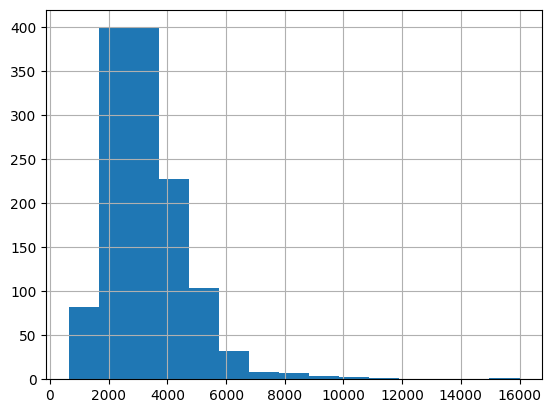

In [ ]:
casa_df.loc[:, "price_per_square_m"].hist(bins=15)
print(casa_df.shape)
casa_df = casa_df.loc[casa_df["price_per_square_m"]<1e4, :]
print(casa_df.shape)

In [ ]:
#casa_df.loc[casa_df["price_per_square_m"]>2e4, :]
print(casa_df.loc[casa_df.surface>10, :].shape)
casa_df = casa_df.loc[casa_df.surface>10, :]

(1265, 11)


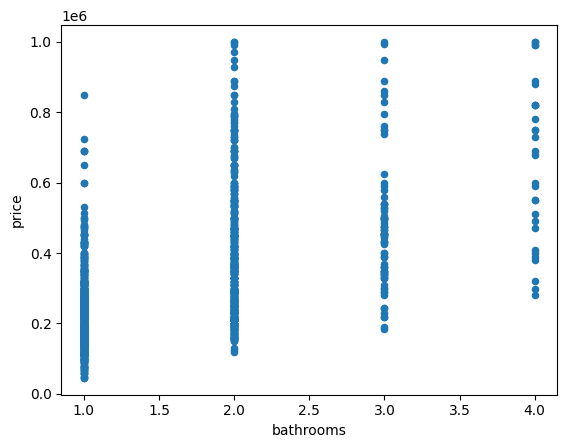

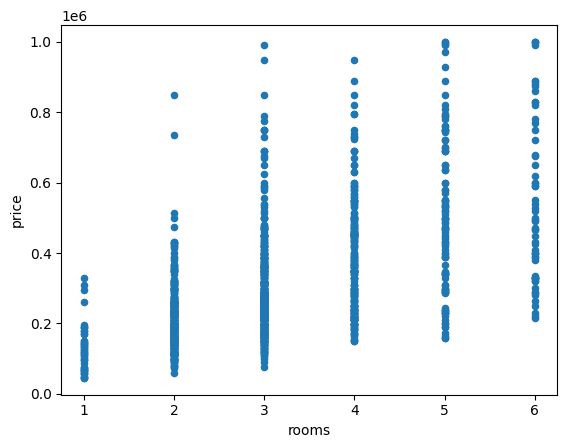

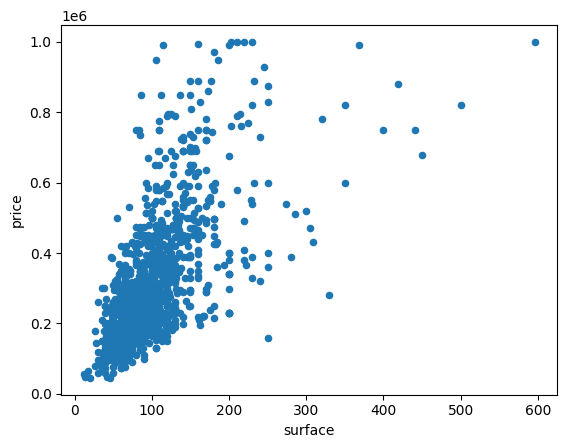

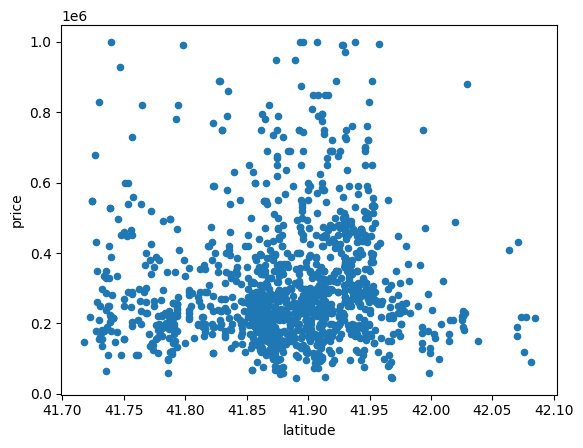

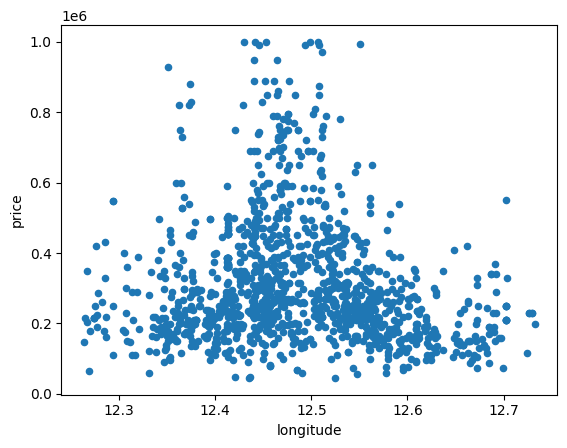

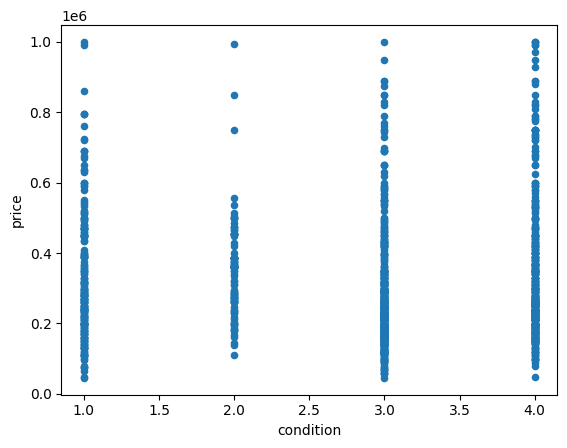

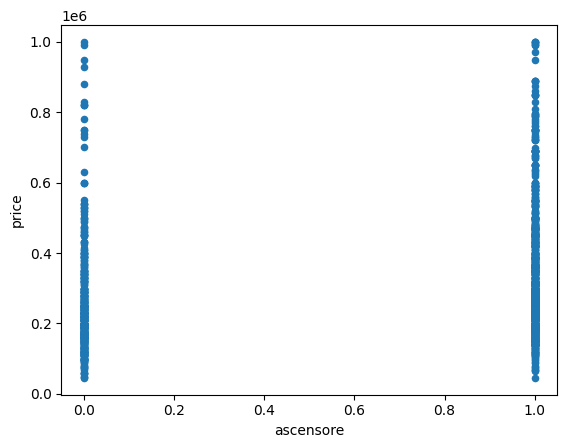

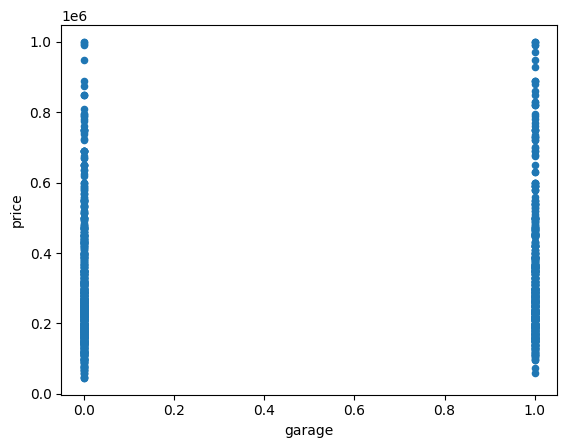

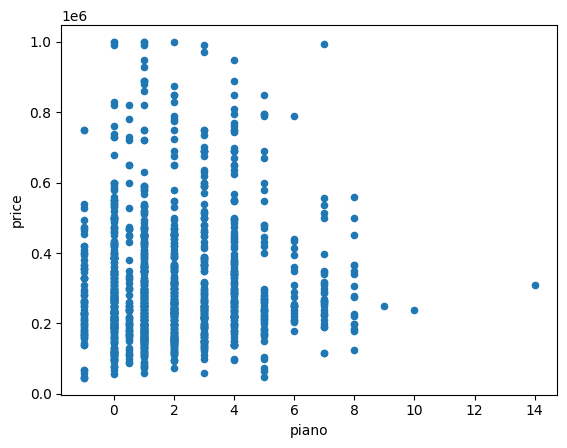

In [ ]:
for col in casa_df.columns:
  if col == "price" or col == "price_per_square_m":
    continue
  casa_df.plot.scatter(x=col, y="price")

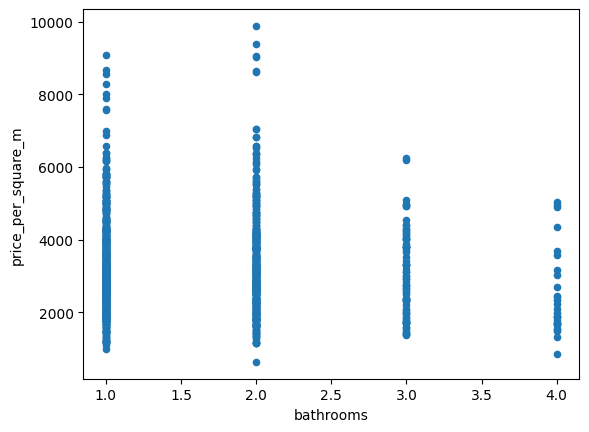

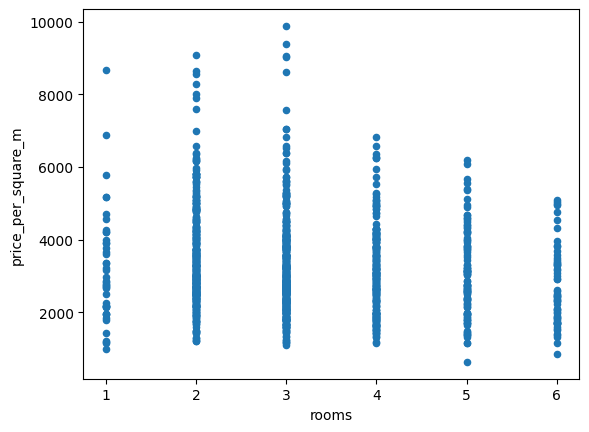

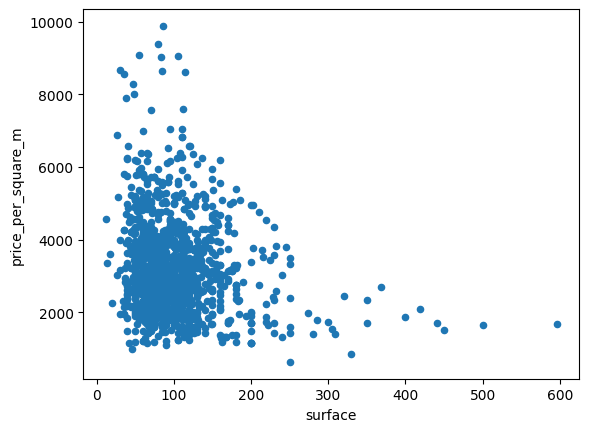

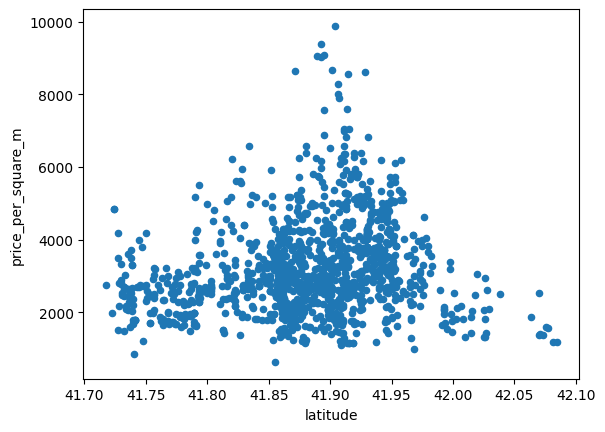

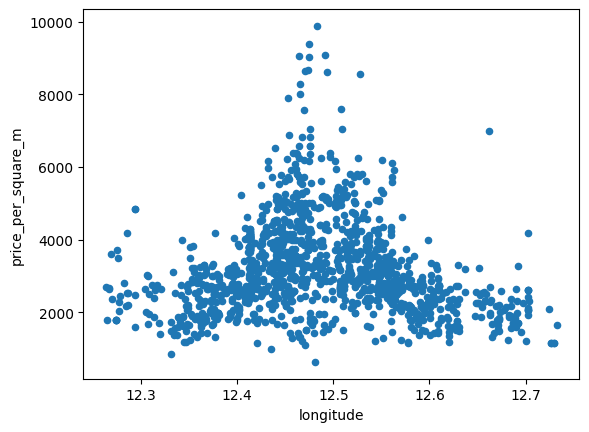

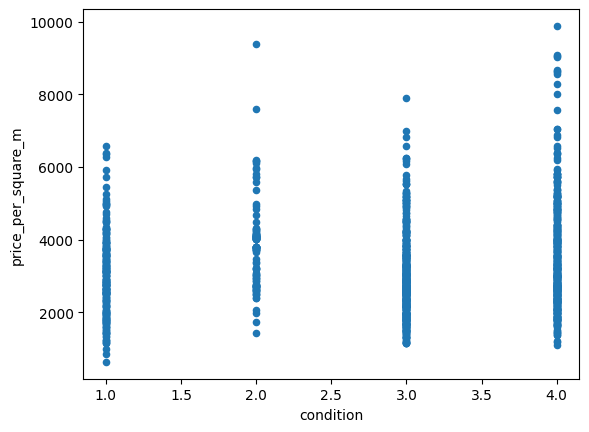

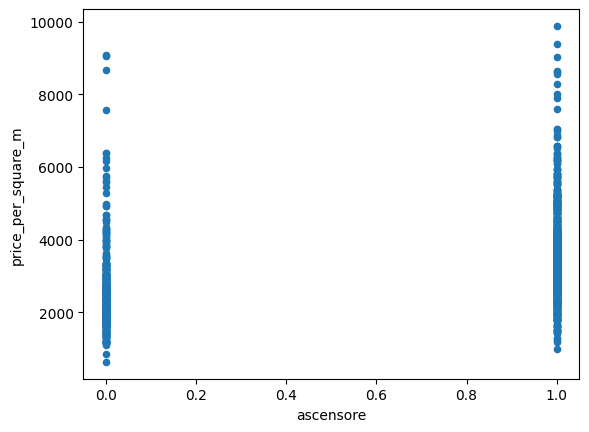

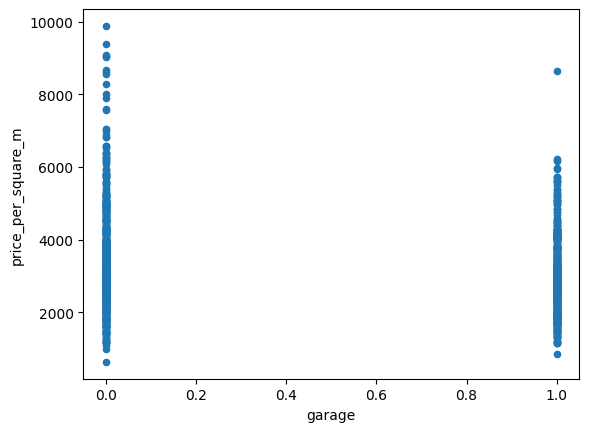

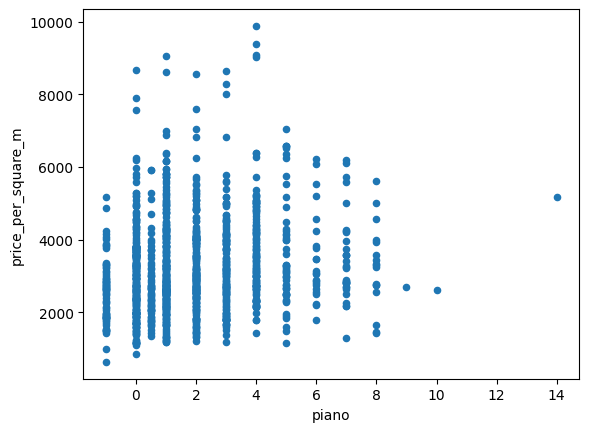

In [ ]:
for col in casa_df.columns:
  if col == "price" or col == "price_per_square_m":
    continue
  casa_df.plot.scatter(x=col, y="price_per_square_m")

In [ ]:
casa_df.to_excel("casa_df_ready4analysis.xlsx")

##**Algoritmi da testare**
1.   Regressione logistica su classi di prezzo
2.   Alberi decisionali
3.   Random Forest
4.   Reti neurali






In [ ]:
if not('casa_df' in locals()):
  casa_df = pd.read_excel("/content/casa_df_ready4analysis.xlsx")
  print("loaded")

In [ ]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # 1. choose model class
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
casa_df

In [ ]:
X = casa_df.loc[:, ['surface', 'latitude', 'longitude', 'bathrooms', 'rooms', 'condition', "piano", "ascensore", "garage"]].values

In [ ]:
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
y = pd.cut(casa_df.loc[:, "price_per_square_m"], bins)


In [ ]:
y = y.astype(str)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
# Define the feature types
continuous_cols = [0, 1, 2]  # indices of continuous columns
discrete_cols = [3, 4, 5, 6]   # indices of discrete columns
boolean_cols = [7, 8]       # indices of boolean columns

# Define the transformers
continuous_transformer = MinMaxScaler()  # or StandardScaler()
discrete_transformer = OneHotEncoder()
boolean_transformer = 'passthrough'

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('continuous', continuous_transformer, continuous_cols),
        ('discrete', discrete_transformer, discrete_cols),
        ('boolean', boolean_transformer, boolean_cols)
    ])

X_combined = np.vstack((X_train, X_test))
preprocessor.fit(X_combined) #needed to avoid different number of features
X_train_norm = preprocessor.transform(X_train)

X_test_norm = preprocessor.transform(X_test)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_train_norm.shape) #train and test are different due to OneHotEncoder
print(X_test_norm.shape)

(1012, 9)
(253, 9)
(1012, 33)
(253, 33)


###logistic regression

In [ ]:
logreg = LogisticRegression(max_iter=200)

# Fit the model to the training data
logreg.fit(X_train_norm, y_train)


LogisticRegression(max_iter=200)

*   Without normalization the accuracy is very low (<.4) and the convergence very slow (more than 1000 iteration).
*   The OneHotEncoder normalization changes the number of the features depending on the number of categories, therefore you can fit the transformer once on the entire dataset.
*   Normalization managed to accelerate a lot the convergence (<200 iterations), but still low accuracy (<.4)

In [ ]:
y_pred = logreg.predict(X_test_norm)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.42


Increasing the bin size the accuracy become much higher, but still rather poor:
*     <.65 with [0, 2000, 4000, 6000, 8000, 10000, 15000]
*     .75 with [0, 4000, 6000, 8000, 10000, 15000]
*     .97 with [0, 6000, 15000]

#### Coarse bins

In [ ]:
bins_coarse = [0, 6000, 15000]
y_coarse = pd.cut(casa_df.loc[:, "price_per_square_m"], bins_coarse)
y_coarse = y_coarse.astype(str)
X_train_coarse, X_test_coarse, y_train_coarse, y_test_coarse = train_test_split(X, y_coarse, test_size=0.2, random_state=55)
X_combined_coarse = np.vstack((X_train_coarse, X_test_coarse))
preprocessor.fit(X_combined_coarse) #needed to avoid different number of features
X_test_norm_coarse = preprocessor.transform(X_test_coarse)
X_train_norm_coarse = preprocessor.transform(X_train_coarse)
logreg.fit(X_train_norm_coarse, y_train_coarse)


LogisticRegression(max_iter=200)

In [ ]:
y_pred_coarse = logreg.predict(X_test_norm_coarse)
accuracy = accuracy_score(y_test_coarse, y_pred_coarse)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


#### Grid search optimised hyper parameters

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],       # Regularization type
    'solver': ['liblinear']        # Solver for optimization problem
}
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=2, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train_norm, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_norm)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report:
               precision    recall  f1-score   support

    (0, 1000]       1.00      0.00      0.00         1
 (1000, 2000]       0.45      0.35      0.39        40
 (2000, 3000]       0.44      0.67      0.53        83
 (3000, 4000]       0.47      0.49      0.48        73
 (4000, 5000]       0.42      0.20      0.27        41
 (5000, 6000]       1.00      0.00      0.00         7
 (6000, 7000]       1.00      0.00      0.00         5
 (7000, 8000]       1.00      0.00      0.00         1
 (8000, 9000]       1.00      0.00      0.00         1
(9000, 10000]       1.00      0.00      0.00         1

     accuracy                           0.45       253
    macro avg       0.78      0.17      0.17       253
 weighted avg       0.48      0.45      0.42       253



### Alberi decisionali

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
regressor = DecisionTreeRegressor(random_state=42)

In [ ]:
X_reg = casa_df.loc[:, ['surface', 'latitude', 'longitude', 'bathrooms', 'rooms', 'condition', "piano", "ascensore", "garage"]].values
y_reg = casa_df.loc[:, "price_per_square_m"].values
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=1)


In [ ]:
# Define the feature types
continuous_cols = [0, 1, 2]  # indices of continuous columns
discrete_cols = [3, 4, 5, 6]   # indices of discrete columns
boolean_cols = [7, 8]       # indices of boolean columns

# Define the transformers
continuous_transformer = MinMaxScaler()  # or StandardScaler()
discrete_transformer = OneHotEncoder()
boolean_transformer = 'passthrough'

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('continuous', continuous_transformer, continuous_cols),
        ('discrete', discrete_transformer, discrete_cols),
        ('boolean', boolean_transformer, boolean_cols)
    ])

X_combined = np.vstack((X_reg_train, X_reg_test))
preprocessor.fit(X_combined) #needed to avoid different number of features
X_reg_train_norm = preprocessor.transform(X_reg_train)

X_reg_test_norm = preprocessor.transform(X_reg_test)

In [ ]:
# Fit the model to the training data
regressor.fit(X_reg_train_norm, y_reg_train)

# Make predictions on the test set
y_reg_pred = regressor.predict(X_reg_test_norm)

# Evaluate the model
mse = mean_squared_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1973947.271160055
R-squared: -0.3050064107664676


In [ ]:
# Create a Decision Tree regressor
regressor = DecisionTreeRegressor(random_state=42)

# Define the hyperparameters grid for grid search
param_grid = {
    'max_depth': [None, 5, 10, 15, 50, 100],
    'min_samples_split': [2, 5, 8, 9, 10, 11, 12, 20, 50],
    'min_samples_leaf': [1, 2, 3, 4, 5, 10]
}

# Perform grid search using Mean Squared Error as the scoring metric
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the model to the training data using grid search
grid_search.fit(X_reg_train_norm, y_reg_train)

# Get the best model with optimal hyperparameters
best_regressor = grid_search.best_estimator_

# Make predictions on the test set
y_reg_pred = best_regressor.predict(X_reg_test_norm)

# Evaluate the model
mse = mean_squared_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", mse**.5)
print("R-squared:", r2)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Root Mean Squared Error: 1020.9059719514123
R-squared: 0.31095341241342467


### Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor(random_state=42)

# Define the hyperparameters grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search using Mean Squared Error as the scoring metric
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the model to the training data using grid search
grid_search.fit(X_reg_train_norm, y_reg_train)

# Get the best model with optimal hyperparameters
best_regressor = grid_search.best_estimator_

# Make predictions on the test set
y_reg_pred = best_regressor.predict(X_reg_test_norm)

# Evaluate the model
mse = mean_squared_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error: 730288.9974395038
R-squared: 0.5171948930476302


In [ ]:
730288.9974395038**.5

854.5694807559557

In [ ]:
import matplotlib.pyplot as plt

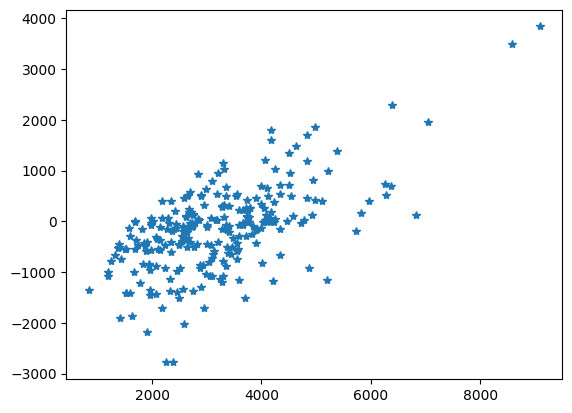

In [ ]:
plt.plot(y_reg_test, y_reg_test-y_reg_pred, "*")

In [ ]:
rmse_partial = mean_squared_error(y_reg_test[y_reg_test<7000], y_reg_pred[y_reg_test<7000])
r2_partial = r2_score(y_reg_test[y_reg_test<7000], y_reg_pred[y_reg_test<7000])
print("Root Mean Squared Error:", rmse_partial**0.5)
print("R-squared:", r2_partial)

Root Mean Squared Error: 784.9786758365311
R-squared: 0.49221703113271


### Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor

# Create a neural network regressor
regressor = MLPRegressor(max_iter=1000, random_state=42)

# Define the hyperparameters grid for grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Perform grid search using Mean Squared Error as the scoring metric
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the model to the training data using grid search
grid_search.fit(X_reg_train_norm, y_reg_train)

# Get the best model with optimal hyperparameters
best_regressor = grid_search.best_estimator_

# Make predictions on the test set
y_reg_pred = best_regressor.predict(X_reg_test_norm)

# Calculate metrics
mse = mean_squared_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", mse**.5)
print("R-squared:", r2)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50)}
Root Mean Squared Error: 1110.987949561359
R-squared: 0.18398941110646927


## **Auxiliary functions**

In [ ]:
def find_k(di, k2f="location"):
  if type(di) is "dict":
    if di.has_key(k2f):
      return "position"
    for k in di.keys():
      find_k(di[k])

In [ ]:
def search(d, k, path=None):
    if path is None:
        path = []

    # Reached bottom of dict - no good
    if not isinstance(d, dict):
        return False

    # Found it!
    if k in d.keys():
        path.append(k)
        return path

    else:
        check = list(d.keys())
        # Look in each key of dictionary
        while check:
            first = check[0]
            # Note which we just looked in
            path.append(first)
            if search(d[first], k, path) is not False:
                break
            else:
                # Move on
                check.pop(0)
                path.pop(-1)
        else:
            return False
        return path



In [ ]:
search(a,"location")

# **Retrieve data through available html classes**

In [ ]:
lista_case = soup.find_all("div", attrs={"class":"nd-mediaObject__content in-card__content in-realEstateListCard__content"})
len(lista_case)
lista_case[0]
lista_case[0].find("li").text
lista_case[0].contents[1].contents[2]
lista_case[0].find_all("li")
[campo["aria-label"] for campo in lista_case[0].find_all("li")[1:]]
[campo.text for campo in lista_case[0].find_all("li")]


25